## FFT for Denoiser

dalam test ini, akan dilakukan percobaan denoiser dengan menggunakan FFT

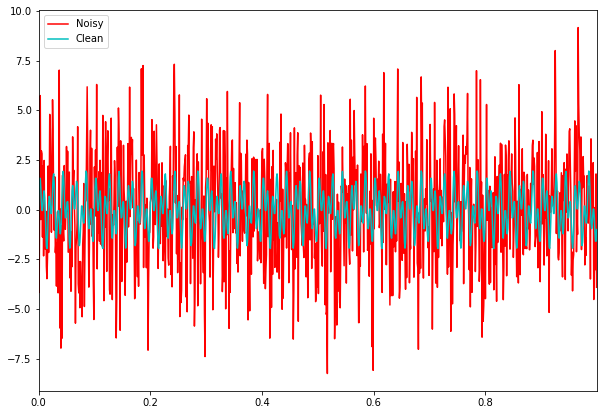

In [63]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,7]
plt.rcParams.update({'font.size' : 10})

# Membuat signal dengan 2 frekuensi
dt = 0.001
t  = np.arange(0,1,dt)
f  = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)
f_clean = f
f  = f + 2.5 * np.random.randn(len(t))

# Menampilkan dalam bentuk plot
plt.plot(t,f,color="r",linewidth=1.5,label="Noisy")
plt.plot(t,f_clean,color="c",linewidth=1.5,label="Clean")
plt.xlim(t[0],t[-1])
plt.legend()

/home/skynet/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


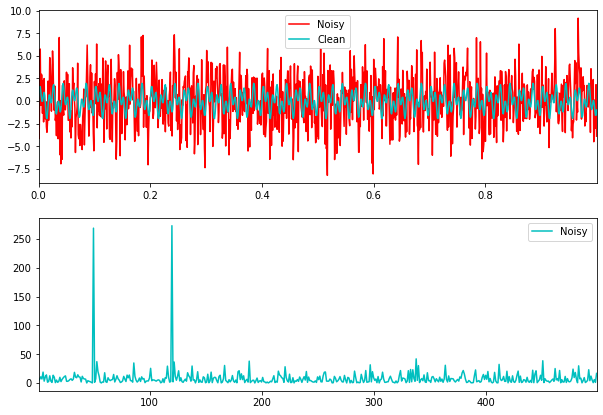

In [64]:
# Menghitung FFT (Fast-Fourier Transform)

n = len(t)
fhat = np.fft.fft(f,n)                            # Menghitung FFT
PSD = fhat * np.conj(fhat) / n                    # Power Spectrum (power per FFT)
freq = (1/(dt*n)) * np.arange(n)                  # Membuat garis X untuk frekuensi
L = np.arange(1, np.floor(n / 2), dtype="int")    # 

fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color="r",linewidth=1.5,label="Noisy")
plt.plot(t,f_clean,color="c",linewidth=1.5,label="Clean")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color="c",linewidth=1.5,label="Noisy")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

In [65]:
# Dengan menggunakan PSD untuk memfilter noise
indices = PSD > 100           # Mencari semua frequency dengan power terbesar
PSDclean = PSD * indices      # Freq yang tidak mencapai 100 akan difilter menjadi 0
fhat = indices * fhat         # Fourier coeff pada sumbu Y dibuat menjadi 0 
ffilt = np.fft.ifft(fhat)     # Inverse FFT untuk sinyal waktu

/home/skynet/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/skynet/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


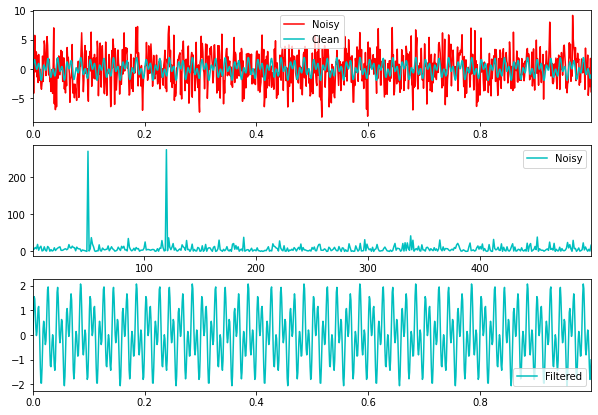

In [66]:
# Menampilkan Ploy
fig, axs = plt.subplots(3,1)

# Freq dan Noise
plt.sca(axs[0])
plt.plot(t,f,color="r",linewidth=1.5,label="Noisy")
plt.plot(t,f_clean,color="c",linewidth=1.5,label="Clean")
plt.xlim(t[0],t[-1])
plt.legend()

# Spectrum
plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color="c",linewidth=1.5,label="Noisy")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

# Noise filtered
plt.sca(axs[2])
plt.plot(t, ffilt, color="c", linewidth=1.5,label="Filtered")
plt.xlim(t[0],t[-1])
plt.legend()

plt.show()